**ETAPA 1. Descripción del Proyecto**

Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

**Para iniciar se deben cargar todas las librerías que se van a usar durante el proyecto.**

In [72]:
# Cargar todas las librerías
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats

**En este sección reuní la totalidad de los dataframe, la función .read_csv permite leer cada uno de los archivos cargados.**

In [73]:
# Cargar los archivos de datos de los diferentes DataFrames
df_hypotheses = pd.read_csv('./datasets/hypotheses_us.csv', sep=';')
df_orders = pd.read_csv('./datasets/orders_us.csv', delimiter=',')
df_visits = pd.read_csv('./datasets/visits_us.csv', delimiter=',')

**Uso las funciones info() y head() para explorar visualmente cada dataframe con el fin de analizar que campos tiene, sus características, y los detalles que no sean funcionales corregir, para hacer un análisis acorde e ideal a lo solicitado.**

**Datos utilizados en la primera parte del proyecto**

**1. Hipótesis**

In [74]:
#Imprimir la información general/resumida sobre el DataFrame hipótesis
df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [75]:
# Imprimir una muestra de los datos para las hipótesis
df_hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


**Datos utilizados en la segunda parte del proyecto**

**1. Órdenes**

In [76]:
#Imprimir la información general/resumida sobre el DataFrame órdenes
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [77]:
# Imprimir una muestra de los datos para las hipótesis
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


**2. Visitas**

In [78]:
# Imprimir la información general/resumida sobre el DataFrame visitas
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [79]:
# Imprimir una muestra de los datos para las visitas
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**ETAPA 2. Preprocesamiento de los datos**

**El objetivo aquí es preparar los datos para que sean analizados. Para ello hay que resolver cualquier problema que haya con los encabezados con el fin preservar las reglas del buen estilo, luego verificar y en su caso corregir los tipos de datos de cada columna, identificar los valores ausentes y si es necesario completar dichos valores, y finalmente identificar y si fuera el caso eliminar los valores duplicados.**

**Datos utilizados en la primera parte del proyecto**

**1. Hipótesis**

**ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS**

a. Cambiar todas las columnas a minúsculas con el fin de preservar las reglas del buen estilo.

b. Calcular el número de valores ausentes.

c. Revisar y eliminar duplicados.


**Tratamiento de las columnas**

In [80]:
# Muestra los nombres de las columnas
df_hypotheses.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort'], dtype='object')

In [81]:
# Generar una función con el fin de reemplazar los nombres de las columnas para ponerlos en minúsculase 
def clear_columns(data):
    new_columns = []
    
    for column in data.columns:
        clean_column = column.lower()
        new_columns.append(clean_column)
        
    data.columns = new_columns
    
    return data

In [82]:
# Aplicar la función al dataframe visitas
df_hypotheses = clear_columns(df_hypotheses)

In [83]:
# Comprobar el resultado: la lista de encabezados
df_hypotheses.head(0)

,hypothesis,reach,impact,confidence,effort


**Tratamiento de los valores ausentes**

Para este conjunto de datos caso de estudio no se procederá a realizar algún tratamiento de los valores ausentes ya que como se puede ver después de generar el código y ejecutar el mismo en la caja CODE de abajo, el dataframe HIPÓTESIS no cuenta con información de este tipo en ninguna de sus columnas.

In [84]:
# Calcular el número de valores ausentes
df_hypotheses.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

**Revisar y eliminar duplicados**

In [85]:
# Revisar si hay valores duplicados
df_hypotheses.duplicated().sum()

0

**Datos utilizados en la segunda parte del proyecto**

**1. Órdenes**

**ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS**


a. Calcular el número de valores ausentes.

b. Corregir errores y preparar los datos de la columna DATE que incluye: convertir de tipo object a tipo datetime64[ns] la columna.

c. Revisar y eliminar duplicados.

d. Explorar los datos en busca de los visitantes que podrían estar más de una vez en un grupo.

**Tratamiento de los valores ausentes**

De igual forma para este conjunto de datos caso de estudio no se procederá a realizar algún tratamiento de los valores ausentes ya que como se puede ver después de generar el código y ejecutar el mismo en la caja CODE de abajo, el dataframe ÓRDENES no cuenta con información de este tipo en ninguna de sus columnas.

In [86]:
# Calcular el número de valores ausentes
df_orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

**Preparar los datos de la columna DATE**

In [87]:
# Convertir de tipo object a tipo datetime64[ns] la columna
df_orders['date'] = pd.to_datetime(df_orders['date'], format='%Y-%m-%d')

In [88]:
# Imprimir la información general actualizada
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


**Revisar y eliminar duplicados**

In [89]:
# Revisar si hay valores duplicados
df_orders.duplicated().sum()

0

**Nota importante:** Para este dataframe, al revisar duplicados implícitos hay un primer caso que analizar en la caja Code [19] resultado de ejecutar la línea de código desarrollada donde el número que devuelve como resultado es 108, este dato no se pueden catalogar como valores duplicados y eliminar ya que no lo son porque **son usuarios que estuvieron en el grupo A o en el grupo B pero no en los dos grupos**, al usar la función duplicated sirve para ver este tipo de valores, pero con está función no puedo ver si es que estuvieron en los dos grupos, lo que si puede pasar es que la misma persona que estuvo en el mismo grupo pudo comprar en el mismo día.

In [90]:
# Buscar valores duplicados implícitos entre las columnas 'visitorId' y 'group' 
df_orders.duplicated(subset=['visitorId', 'group']).sum()

108

En un segundo caso a analizar en la caja Code [20] después de ejecutar la línea de código devuelve como resultado 26, este otro dato tampoco se puede catalogar como valores duplicados y eliminar ya que no lo son porque **el mismo usuario del mismo grupo en la misma fecha compro o sea que hubo una recompra**  y no esta mal si se revisa con la función duplicated. Finalmente se debe desarrollar una buena capacidad de análisis para identificar este tipo de variantes que pueden presentarse en un proceso de compra para no eliminar cualquier valor(es) que tengan un aspecto de duplicados pero que no lo sean.

In [91]:
# Buscar valores duplicados implícitos entre las columnas 'visitorId', 'group' y 'date' 
df_orders.duplicated(subset=['visitorId', 'group', 'date']).sum()

26

**Explorar los datos en busca de los visitantes que podrían estar más de una vez en un grupo**

**El resultado de ejecutar la caja Code [22] significa que a estos usuarios el sistema en la misma fecha les mando dos páginas diferentes, por tal razón estos registros si se deben de eliminar porque alteran por completo el análisis del proyecto que estoy desarrollando. Enviar dos versiones diferentes de la misma página a la misma persona el mismo día puede introducir sesgos y errores en los resultados de la prueba.**

In [92]:
# Agrupar por las columnas VISITORID y DATE 
# Calcular el número de valores únicos que existen en la columna GROUP
# Ordenar los resultados en orden descendente según el número de grupos únicos y resetear el índice del dataframe resultante
# Filtrar las filas para dejar solo aquellas en las que el número de grupos únicos sea mayor que 1
df_orders.groupby(['visitorId', 'date'])['group'].nunique().sort_values(ascending=False).reset_index().query('group >1')

,visitorId,date,group
0,2587333274,2019-08-08,2
1,477780734,2019-08-30,2
2,2579882178,2019-08-18,2
3,2038680547,2019-08-04,2
4,1316129916,2019-08-27,2
5,232979603,2019-08-31,2
6,3891541246,2019-08-04,2
7,1801183820,2019-08-05,2
8,3062433592,2019-08-12,2
9,1230306981,2019-08-09,2


In [93]:
# Crear un dataframe nuevo FILTERED DF ORDERS
filtered_df_orders = df_orders.groupby(['visitorId', 'date'])['group'].nunique().sort_values(ascending=False).reset_index().query('group >1')

**2. Visitas**

ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS

a. Calcular el número de valores ausentes.

b. Corregir errores y preparar los datos de la columna DATE que incluye: convertir de tipo object a tipo datetime64[ns] la columna.

c. Revisar y eliminar duplicados.

**Tratamiento de los valores ausentes**

Para este último conjunto de datos caso de estudio también no se procederá a realizar algún tratamiento de los valores ausentes ya que como se puede ver después de generar el código y ejecutar el mismo en la caja CODE de abajo, el dataframe VISITAS no cuenta con información de este tipo en ninguna de sus columnas.

In [94]:
# Calcular el número de valores ausentes
df_visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

**Preparar los datos de la columna DATE**

In [95]:
# Convertir de tipo object a tipo datetime64[ns] la columna
df_visits['date'] = pd.to_datetime(df_visits['date'], format='%Y-%m-%d')

In [96]:
# Imprimir la información general actualizada
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Revisar y eliminar duplicados**

In [97]:
# Revisar si hay valores duplicados
df_visits.duplicated().sum()

0

**ETAPA 3. Análisis exploratorio**

**Datos utilizados en la primera parte del proyecto**

**1. Priorizar hipótesis**

# Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad

In [98]:
# Imprimir la información general del dataframe hypotheses
df_hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [99]:
# Seleccionar el elemento que se encuentra en la primera fila y la primera columna del dataframe 
df_hypotheses.iloc[0, 0]

'Add two new channels for attracting traffic. This will bring 30% more users'

In [100]:
# Aplicar el framework ICE para priorizar hipótesis
df_hypotheses['ICE'] = (df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort']

In [101]:
# Ordenar en orden descendente de prioridad
df_hypotheses.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


**Después de haber realizado el calculo mediante el framework ICE (Impacto Confianza Esfuerzo) puedo concluir lo siguiente:** La hipótesis de **lanzar una promoción que ofrezca descuentos a los usuarios en sus cumpleaños** tiene el valor ICE más alto 16.200000. Esto sugiere que, aunque el impacto y la confianza son altos, y el esfuerzo relativamente bajo, hacen de esta una de las estrategias más prometedoras para implementar primero. La hipótesis de **agregar dos nuevos canales para atraer tráfico. Esto traerá un 30% más de usuarios** tiene un valor ICE elevado 13.333333, indica que aunque el esfuerzo es un poco mayor, el impacto y la confianza son muy altos. Esta estrategia también debería considerarse una prioridad. **Agregar un formulario de suscripción en todas las páginas principales. Esto te ayudará a compilar una lista de correos.** Tiene un ICE de 11.200000, lo cual refleja que es una opción fuerte con alto alcance e impacto moderado. **Mostrar banners con ofertas y rebajas vigentes en la página principal. Esto impulsará la conversión.** con un valor ICE 8.000000 y **agregar bloques de recomendación de productos al sitio de la tienda. Esto aumentará la conversión y el tamaño promedio de compra.** con un ICE de 7.000000 también destacan, pero con menor prioridad en comparación a las anteriores hipótesis debido a un menor impacto y alcance. Finalmente las últimas cuatro hipótesis deberían considerarse en una menor prioridad ya que tienen un menor impacto y por lo tanto son más difíciles de implementar.

# Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [102]:
# Aplicar el framework RICE para priorizar hipótesis
df_hypotheses['RICE'] =  (df_hypotheses['reach'] * df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort']

In [103]:
# Ordenar en orden descendente de prioridad
df_hypotheses.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


**Después de haber realizado el calculo mediante el framework RICE (Alcance Impacto Confianza Esfuerzo) puedo concluir lo siguiente:** La hipótesis de **agregar un formulario de suscripción en todas las páginas principales. Esto te ayudará a compilar una lista de correos** tiene el valor RICE más alto 112.0, esto significa que esta estrategia tiene un alto alcance, impacto y confianza, con un esfuerzo moderado. Lo nos indica que es una de las acciones más prometedoras. **Agregar bloques de recomendación de productos al sitio de la tienda. Esto aumentará la conversión y el tamaño promedio de compra** tiene un valor RICE de 56.0. Aunque su valor ICE es de 7.000000, el valor RICE es alto, indicando que tiene un alcance significativo y es una buena opción para aumentar la conversión y el tamaño promedio de compra. **Agregar dos nuevos canales para atraer tráfico. Esto traerá un 30% más de usuarios** y **mostrar banners con ofertas y rebajas vigentes en la página principal. Esto impulsará la conversión.** Tienen valores RACE similares de 40.0, lo que sugiere que ambas hipótesis tienen un buen balance entre el alcance, impacto, confianza y esfuerzo, siendo también opciones viables. La hipótesis de **lanzar una promoción que ofrezca descuentos a los usuarios en sus cumpleaños** se observa que tiene el valor ICE más alto 16.200000, y su valor RICE 16.2 es menor comparado con otras estrategias debido a su bajo alcance. Finalmente las últimas cuatro hipótesis deberían considerarse en una menor prioridad ya que tiene valores RICE bajos. Esto indica que tienen un menor alcance, impacto, confianza o un esfuerzo más alto.

# Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

Usar el framework RICE en lugar de ICE cambia la prioridad de las hipótesis al incluir la dimensión del alcance, permitiendo que las estrategias que afectan a más usuarios sean consideradas primero. Esto resulta útil para maximizar el impacto de las acciones en términos de la cantidad de usuarios beneficiados, y no solo por el impacto o el esfuerzo involucrado.

**Datos utilizados en la segunda parte del proyecto**

**2. Análisis del test A/B**

# Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas

In [104]:
# Crear una matriz con valores únicos
dates_groups = df_orders[['date', 'group']].drop_duplicates()

In [105]:
# Obtener las filas de la tabla ORDERS y agregar los valores
# Negar los registros de la lista repetida FILTERED DF ORDERS  
orders_aggregated = dates_groups.apply(
    lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group']) 
                        & ~df_orders['visitorId'].isin(filtered_df_orders['visitorId'])].agg({
        'date': 'max', 
        'group': 'max', 
        'transactionId': pd.Series.nunique, 
        'visitorId': pd.Series.nunique, 
        'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])

In [106]:
# Imprimir una muestra de los datos para las órdenes agregadas
orders_aggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,19,19,1258.8
175,2019-08-02,A,43,37,3770.1
173,2019-08-02,B,43,42,3882.6
291,2019-08-03,A,67,61,5585.3


In [107]:
# Obtener las filas de la tabla VISITS y agregar los valores
visitors_aggregated = dates_groups.apply(
    lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'], df_visits['group'] == x['group'])].agg({
        'date': 'max', 
        'group': 'max', 
        'visits': 'sum'}), axis=1).sort_values(by=['date', 'group'])

In [108]:
# Imprimir una muestra de los datos para los visitantes agregados
visitors_aggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [109]:
# Unir los dataframes ORDERS AGGREGATED y VISITORS AGGREGATED y cambiar el nombre a las columnas
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [110]:
# Imprimir una muestra de los datos para los ingresos acumulados
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,19,19,1258.8,713
2,2019-08-02,A,43,37,3770.1,1338
3,2019-08-02,B,43,42,3882.6,1294
4,2019-08-03,A,67,61,5585.3,1845


**Graficar los resultados obtenidos**

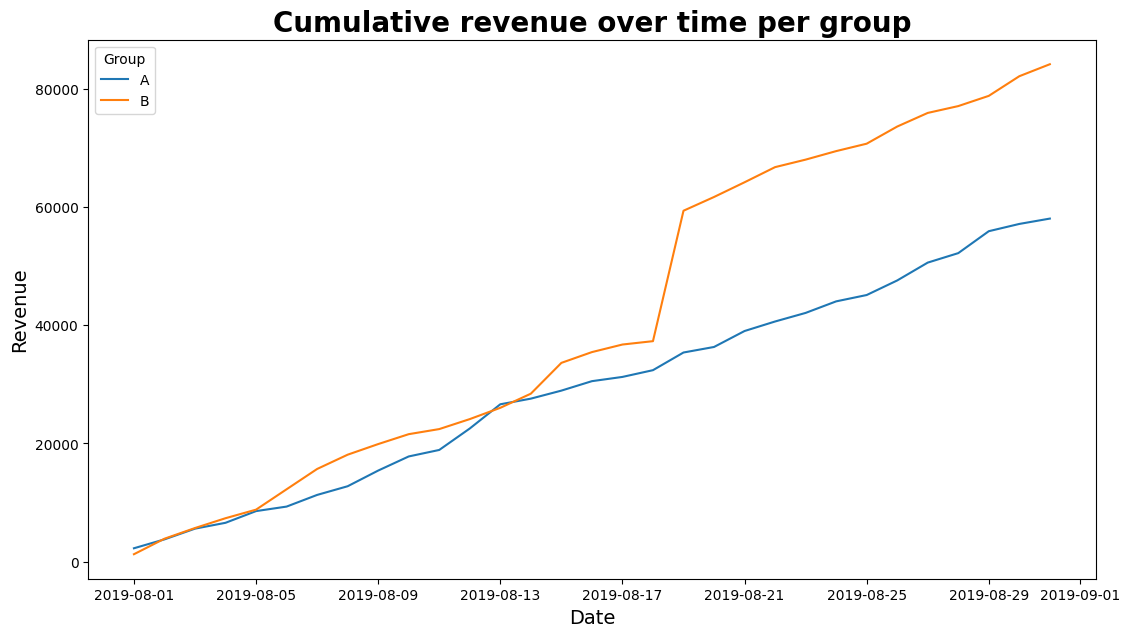

In [111]:
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulative_revenueA = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulative_revenueB = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

# Crear un dataframe combinado 
combined_data = pd.concat([cumulative_revenueA, cumulative_revenueB])
combined_data['group'] = ['A']*len(cumulative_revenueA)+['B']*len(cumulative_revenueB)

# Graficar los datos con la librería Seaborn
plt.figure(figsize=(13, 7))
sns.lineplot(x='date', y='revenue', hue='group', data=combined_data)
plt.legend(title='Group')
plt.title('Cumulative revenue over time per group', fontsize=20, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.show()

**Conjeturas**

*a.* Tal vez ocurrieron eventos externos que afectaron positivamente al Grupo B, como una campaña de marketing, o acuerdos comerciales.

*b.* La diferencia en el crecimiento puede ser temporal, y el Grupo A podría mejorar sus ingresos acumulados en periodos futuros si hacen ajustes en sus estrategias.

*c.* Es posible que el Grupo B haya implementado una estrategia diferente que resultó en un aumento significativo de sus ingresos a partir de la tercera semana de Agosto.

**Conclusiones**

Como se puede visiualizar en la gráfica al inicio del periodo ambos Grupos comenzaron con niveles de ingresos acumulados similares, como fue transcurriendo el tiempo el Grupo B mostró una mejor fortaleza e incremento sus ingresos a una tasa más rápida que el Grupo A y finalmente en los últimos 8 días del periodo hay una marcada diferencia, donde los ingresos acumulados del Grupo B son notablemente más altos que los del Grupo A. 

# Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas

**Graficar los resultados obtenidos**

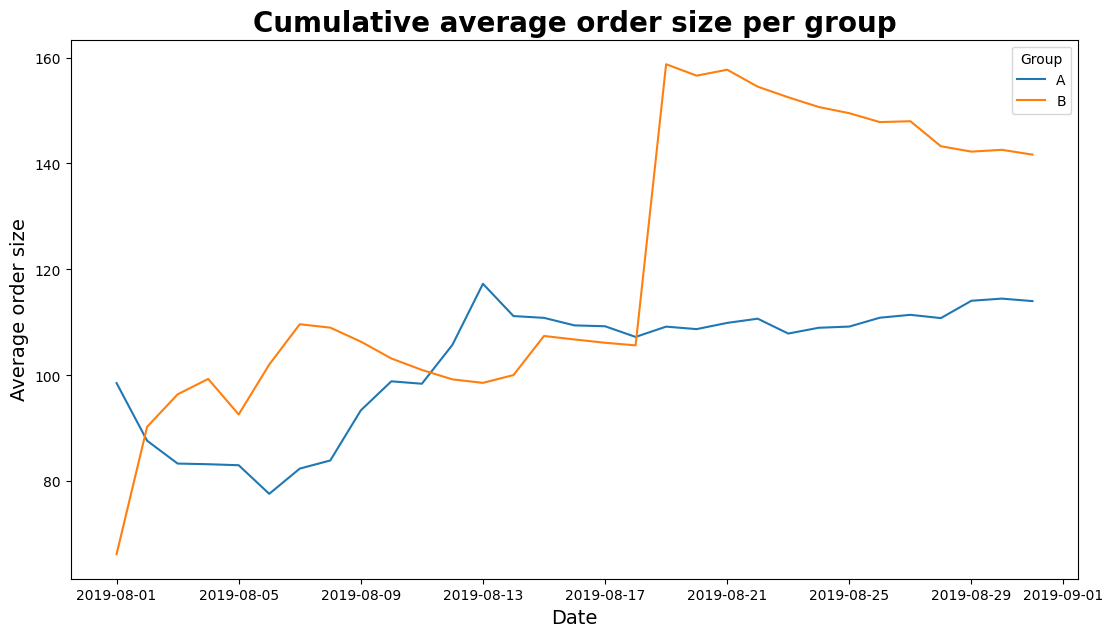

In [112]:
# Calcular el tamaño de pedido promedio acumulado por grupo
cumulative_revenueA['average_order_size'] = cumulative_revenueA['revenue'] / cumulative_revenueA['orders']
cumulative_revenueB['average_order_size'] = cumulative_revenueB['revenue'] / cumulative_revenueB['orders']

# Crear un dataframe combinado
combined_data = pd.concat([cumulative_revenueA.assign(group='A'),cumulative_revenueB.assign(group='B')])

# Graficar los datos con la librería Seaborn
plt.figure(figsize=(13, 7))
sns.lineplot(x='date', y='average_order_size', hue='group', data=combined_data)
plt.legend(title='Group')
plt.title('Cumulative average order size per group', fontsize=20, weight='bold')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Average order size', fontsize=14)
plt.show()

**Conjeturas**

*a.* El aumento significativo del Grupo B podría estar relacionado con una promoción especial a mediados de Agosto.

*b*. Factores externos podrían haber influido positivamente en el comportamiento de compra del Grupo B.

*c*. El Grupo A no esta implementando una buena estrategia de ventas esto se ven reflejado en el comportamiento de compra.  

**Conclusiones**

Como se puede ver en la gráfica el Grupo B esta experimentando un aumento significativo en el tamaño promedio de los pedidos alrededor del 18 de Agosto de 2019 alcanzando un pico cercano a 155 pedidos en promedio, antes de disminuir y estabilizarse en aproximadamente 135 pedidos en promedio. Para concluir se visualiza que inicialmente, el Grupo A tenía un tamaño promedio de pedidos más alto en comparación con el Grupo B. Esto podría deberse a una mayor demanda inicial o a una mejor estrategia de ventas del Grupo A. Además el Grupo B no solo logró superar al Grupo A en términos de tamaño promedio de pedidos, sino que también mantuvo esta ventaja a pesar de la disminución después de haber alcanzando su pico más alto.

# Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

In [113]:
# Unir los datos de CUMULATIVE REVENUE A y CUMULATIVE REVENUE B en un dataframe
merged_cumulative_revenue = cumulative_revenueA.merge(
    cumulative_revenueB, 
    left_on='date', right_on='date', 
    how='left', suffixes=['A', 'B'])

In [114]:
# Imprimir una muestra de los datos
merged_cumulative_revenue.head()

,date,revenueA,ordersA,average_order_sizeA,revenueB,ordersB,average_order_sizeB
0,2019-08-01,2266.6,23,98.547826,1258.8,19,66.252632
1,2019-08-02,3770.1,43,87.676744,3882.6,43,90.293023
2,2019-08-03,5585.3,67,83.362687,5689.4,59,96.430508
3,2019-08-04,6575.9,79,83.239241,7351.2,74,99.340541
4,2019-08-05,8554.0,103,83.048544,8800.5,95,92.636842


**Graficar los resultados obtenidos**

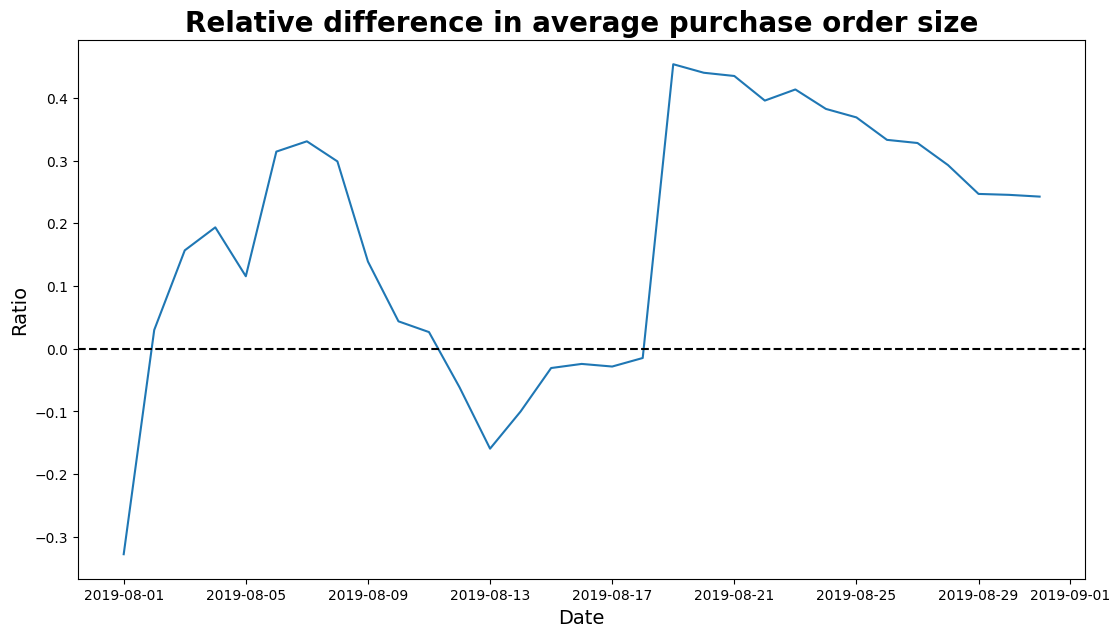

In [115]:
# Calcular la diferencia relativa en el tamaño de pedido promedio de compra
merged_cumulative_revenue['ratio'] = (
    merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['ordersB']) / (
    merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['ordersA']) - 1 

# Graficar los datos con la librería Seaborn
plt.figure(figsize=(13, 7))
sns.lineplot(x='date', y='ratio', data=merged_cumulative_revenue)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative difference in average purchase order size', fontsize=20, weight='bold')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Ratio', fontsize=14)
plt.show()

**Conjeturas**

*a*. El aumento significativo en la diferencia relativa podría ser el resultado de una campaña de marketing exitosa que aumentó temporalmente el tamaño promedio de los pedidos del Grupo B.

*b*. Cambios en la demanda del mercado o preferencias de los clientes podrían haber influido en el comportamiento de compra, beneficiando al Grupo B más que al Grupo A.

*c*. Factores estacionales podrían haber tenido un impacto en la diferencia relativa observada, llevando a fluctuaciones en el tamaño promedio de los pedidos.

**Conclusiones**

El gráfico muestra que al inicio del periodo, la diferencia relativa en el tamaño promedio de los pedidos fluctuaba alrededor de valores negativos, indicando que, en promedio, el Grupo A tenía pedidos más grandes en comparación con el Grupo B. Alredor del 18 de Agosto 2019, hubo un pico significativo en la diferencia relativa, alcanzando un valor máximo cercano a 0.5. Esto sugiere que, en este punto, el Grupo B tenía un tamaño promedio de pedidos notablemente mayor que el Grupo A. Finalmente se puede ver que al final del periodo, la diferencia relativa comenzó a disminuir nuevamente, pero aún se mantenía en valores positivos, lo que indica que el Grupo B continuaba teniendo un tamaño promedio de pedidos mayor que el Grupo A.

# Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

In [116]:
# Calcular la conversión acumulada
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

In [117]:
# Imprimir una muestra de los datos
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,19,19,1258.8,713,0.026648
2,2019-08-02,A,43,37,3770.1,1338,0.032138
3,2019-08-02,B,43,42,3882.6,1294,0.033230
4,2019-08-03,A,67,61,5585.3,1845,0.036314


**Graficar los resultados obtenidos**

**Tasa de conversión de cada grupo**

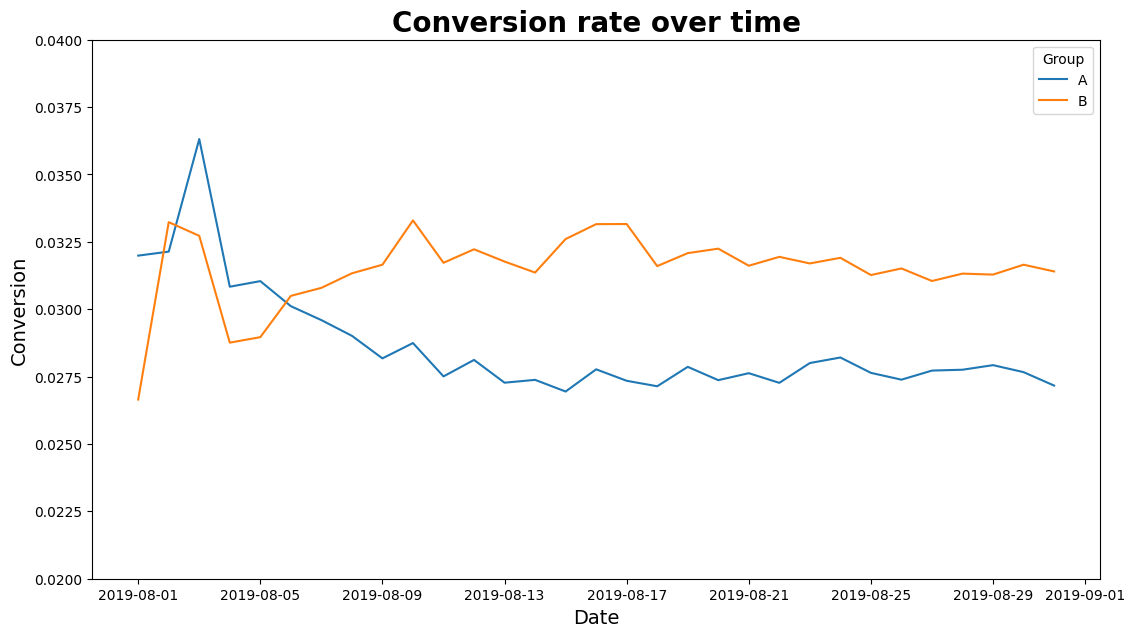

In [118]:
# Seleccionar los datos por grupo
cumulative_dataA = cumulative_data[cumulative_data['group']=='A']
cumulative_dataB = cumulative_data[cumulative_data['group']=='B']

# Crear un dataframe combinado
combined_data = pd.concat([cumulative_dataA, cumulative_dataB])

# Graficar los datos con la librería Seaborn
plt.figure(figsize=(13, 7))
sns.lineplot(x='date', y='conversion', hue='group', data=combined_data)
plt.legend(title='Group')
plt.title('Conversion rate over time', fontsize=20, weight='bold')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Conversion', fontsize=14)
plt.ylim(0.020, 0.040)
plt.show()

**Conjeturas**

*a*. El crecimiento rápido y las fluctuaciones en la tasa de conversión del Grupo B pueden ser resultado de promociones realizadas durante el mes de Agosto.

*b* La fluctuación en las tasas de conversión podría estar relacionada con factores temporales como cambios en la demanda del mercado.

*c*. El descenso en la tasa de conversión del Grupo A podría ser resultado de una mayor competencia por parte del Grupo B, lo que podría haber llevado al Grupo A a realizar ajustes en sus estrategias, pero sin lograr mantener su ventaja inicial.

**Conclusiones**

Como se muestra en los datos de la gráfica al inicio del periodo el Grupo A tenía una tasa de conversión ligeramente superior a la del Grupo B, a partir de que el Grupo B empieza a superar al Grupo A, el Grupo B experimentó algunas fluctuaciones en su tasa de conversión, oscilando alrededor de 0.0330, pero finalmente terminó el periodo con una tasa superior a la del Grupo A. Finalmente se puede ver que la tasa de conversión del Grupo A tuvo una tendencia a la baja desde su pico inicial, terminando justo por debajo de 0.0275 al final del periodo.


**Diferencia relativa para las tasas de conversión**

In [119]:
# Unir los datos de CUMULATIVE REVENUE CONVERSION A y CUMULATIVE REVENUE CONVERSION B en un dataframe
merged_cumulative_conversions = cumulative_dataA[['date','conversion']].merge(
    cumulative_dataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [120]:
# Imprimir una muestra de los datos
merged_cumulative_conversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.026648
1,2019-08-02,0.032138,0.033230
2,2019-08-03,0.036314,0.032723
3,2019-08-04,0.030835,0.028760
4,2019-08-05,0.031043,0.028963


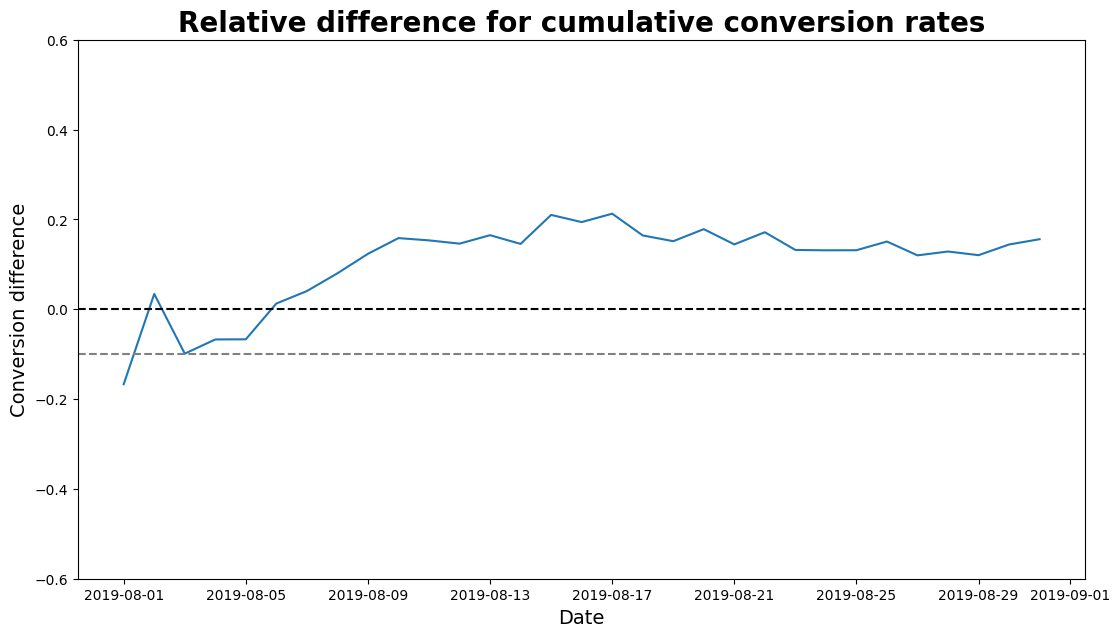

In [121]:
# Calcular la diferencia relativa para las tasas de conversión acumuladas
merged_cumulative_conversions['conversion_difference'] = merged_cumulative_conversions['conversionB'] / merged_cumulative_conversions['conversionA']-1

# Graficar los datos con la librería Seaborn
plt.figure(figsize=(13, 7))
sns.lineplot(x='date', y='conversion_difference', data=merged_cumulative_conversions)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('Relative difference for cumulative conversion rates', fontsize=20, weight='bold')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Conversion difference', fontsize=14)    
plt.ylim(-0.6, 0.6)
plt.show()

**Esta gráfica es complementaria a la anterior, ya que muestra la diferencia relativa para las tasas de conversión acumulada de cada Grupo.**

**Conjeturas**

*a*. El rápido aumento en la diferencia relativa podría ser resultado de una campaña de marketing o promoción exitosa por parte del Grupo B que mejoró su tasa de conversión acumulada en la tercera semana de Agosto.

*b* Cambios en la demanda del mercado o en el comportamiento de los consumidores, podrían haber beneficiado al Grupo B, llevando a un aumento en su tasa de conversión acumulada.

*c*. Identificar los elementos que diferencian al Grupo B y adaptarlos al Grupo A podrían impulsar un mayor crecimiento en las tasas de conversión.

**Conclusiones** 

Como se puede ver en la gráfica al inicio del periodo, la diferencia relativa en las tasas de conversión acumuladas entre los Grupos A y B fluctuaba alrededor de valores negativos, lo que indica que el Grupo A tenía una tasa de conversión ligeramente superior a la del Grupo B, la diferencia relativa comenzó a aumentar rápidamente, alcanzando un nivel alto de alrededor de 0.2. Esto sugiere que el Grupo B logró mejorar su tasa de conversión acumulada y superar al Grupo A. Para concluir se puede ver que, aunque el Grupo B experimento fluctuaciones, logró mantener una ventaja sobre el grupo A en términos de la tasa de conversión acumulada.

# Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

In [122]:
# Calcular el número de pedidos por usuario
orders_per_users = (df_orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))

In [123]:
# Cambiar el nombre a las columnas
orders_per_users.columns = ['visitorId', 'orders']

In [124]:
# Validar los cambios en el nombre de las columnas
orders_per_users.columns

Index(['visitorId', 'orders'], dtype='object')

In [125]:
# Ordenar por el número de pedidos por usuario e imprimir una muestra de los datos
orders_per_users.sort_values(ascending=False, by='orders').head(5)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


**Graficar los resultados obtenidos**

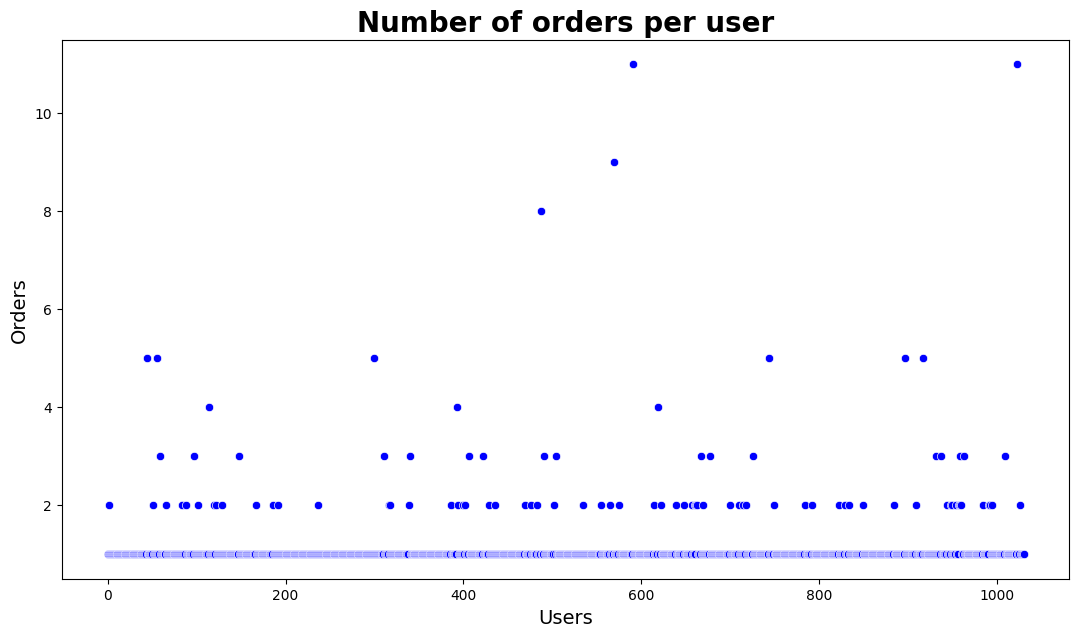

In [126]:
# Crear la serie x_values
x_values = pd.Series(range(0, len(orders_per_users)))

# Crear un DataFrame con x_values y orders
scatter_data = pd.DataFrame({'x_values': x_values, 'orders': orders_per_users['orders']})

# Graficar los datos con la librería Seaborn
plt.figure(figsize=(13, 7))
sns.scatterplot(x='x_values', y='orders', color='blue', data=scatter_data)
plt.title('Number of orders per user', fontsize=20, weight='bold')
plt.xlabel('Users',fontsize=14)
plt.ylabel('Orders', fontsize=14)    
plt.show()

**Conjeturas**

*a*. Podría haber una correlación entre ciertos factores como promociones o recompensas y el número de pedidos realizados por los usuarios frecuentes.

*b*. Los usuarios que realizan más pedidos podrían tener características demográficas o hábitos de compra diferentes a la mayoría.


**Conclusiones**

Como se puede visuaizar la mayoría de los usuarios tienden a realizar una baja cantidad de pedidos, pero también existe un grupo minoritario de usuarios que realiza una cantidad significativamente mayor de pedidos. Finalmente se puede observar que a medida que aumenta el número de usuarios, parece haber una tendencia a aumentar el número de pedidos, aunque esta relación no es lineal y parece haber una saturación en cierto punto.

# Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [127]:
np.percentile(orders_per_users['orders'], [90, 95, 99])

array([1., 2., 4.])

El valor en el **percentil 90** significa que el 90% de los usuarios está en el rango de tener un máximo de 1 pedido.

El valor en el **percentil 95** significa que el 95% de los usuarios están dentro de un rango de 2 o menos pedidos.

El valor en el **percentil 99** significa que el 99% de los usuarios tienen 4 o menos pedidos. Solo el 1% restante de los usuarios tienen más de 4 pedidos.

**Interpretación de anomalías** 

Dado este patrón, se puede definir una **anomalía** como un **usuario** que tiene más de 4 pedidos. Este usuario estaría fuera del rango del 99% de los usuarios, y por lo tanto, su comportamiento podría considerarse **anómalo** en comparación con el resto de los usuarios.

# Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

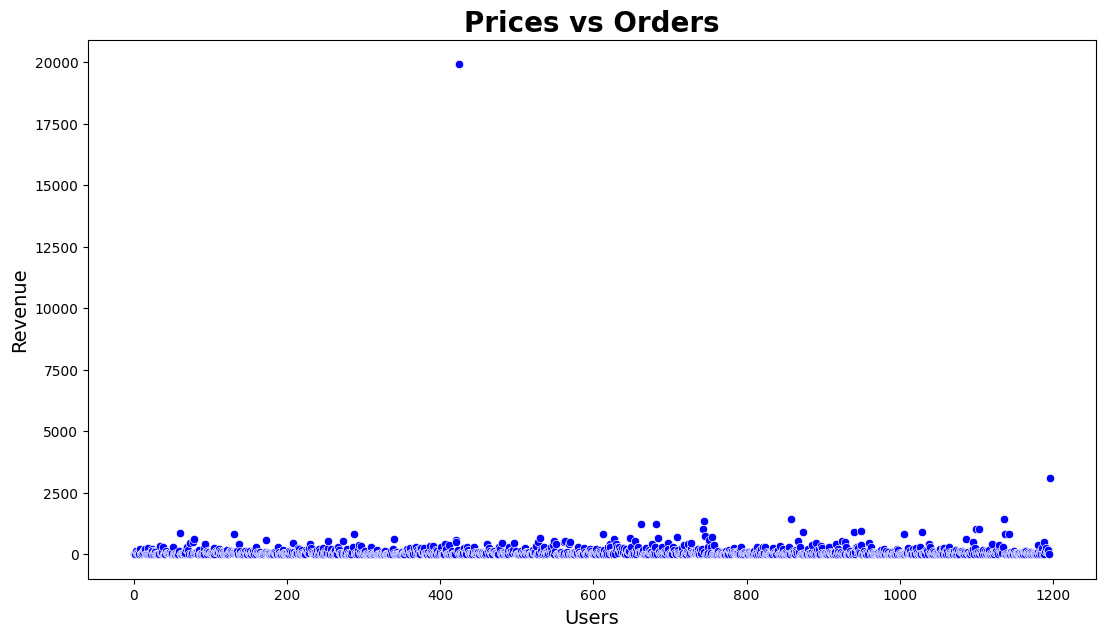

In [128]:
# Crear la serie x_values
x_values = pd.Series(range(0, len(df_orders['revenue'])))

# Crear un DataFrame con x_values y prices
scatter_data = pd.DataFrame({'x_values': x_values, 'revenue': df_orders['revenue']})

# Graficar los datos con la librería Seaborn
plt.figure(figsize=(13, 7))
sns.scatterplot(x='x_values', y='revenue', color='blue', data=scatter_data)
plt.title('Prices vs Orders', fontsize=20, weight='bold')
plt.xlabel('Users',fontsize=14)
plt.ylabel('Revenue', fontsize=14)    
plt.show()

**Conjeturas**

*a*. Los usuarios que generan altos ingresos podrían tener características específicas, como mayor frecuencia de compra, comprar de mayor valor, o estar influenciados por ofertas y promociones específicas.

*b*. Para los usuarios con bajos valores de compra implementar estrategias de marketing que los motiven a incrementar sus compras.

*c*. Para los usuarios de alto valor retener y fidelizar a estos usuarios para que sigan comprando, y potencialmente compren aún más.

**Conclusiones**

Como se puede ver en la gráfica la distribución de ingresos entre los usuarios está bastante sesgada hacia valore bajos. Además de que hay pocos usuarios que generan ingresos muy altos, lo que indica un grupo reducido de clientes de alto valor.

# Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [129]:
np.percentile(df_orders['revenue'], [90, 95, 99])

array([282.48 , 435.54 , 900.904])

El valor en el **percentil 90** significa que el 90% de los precios de los pedidos tienen un ingreso menor o igual a 282.48. Solo el 10% de los precios de los pedidos tienen un ingreso mayor a 282.48.

El valor en el **percentil 95** significa que el 95% de los precios de los pedidos tienen un ingreso menor o igual a 435.54. Solo el 5% de los precios de los pedidos tienen un ingreso mayor a 435.54.

El valor en el **percentil 99** significa que el 99% de los precios de los pedidos tienen un ingreso menor o igual 900.904. Solo el 1% de los precios de los pedidos tiene un ingreso superior a 900.904.

**Interpretación de anomalías** 

Dado este patrón, cualquier **ingreso superior a 900.904** se consideraría una **anomalía** porque está fuera de lo común, representando solo el 1% superior de todos los precios de los pedidos. Podrían enfocarse en los **usuarios** que generanestos ingresos altos, ya que podrían ser usuarios muy valiosos o incluso, en algunos contextos, casos de fraude si se comportan de manera inusual. 

# Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [130]:
# Calcular el número de pedidos realizados, grupo A
orders_per_usersA = df_orders[df_orders['group'] == 'A'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

In [131]:
# Cambiar el nombre a las columnas
orders_per_usersA.columns = ['visitorId', 'orders']

In [132]:
# Calcular el número de pedidos realizados, grupo B
orders_per_usersB = df_orders[df_orders['group']=='B'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

In [133]:
# Cambiar el nombre a las columnas
orders_per_usersB.columns = ['visitorId', 'orders']

In [134]:
# Declarar las variables sampleA y sampleB con usuarios de diferentes grupos y números de pedidos correspondientes
sampleA = pd.concat([orders_per_usersA['orders'],pd.Series(0, index=np.arange(
    df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_per_usersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_per_usersB['orders'],pd.Series(0, index=np.arange(
    df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_per_usersA['orders'])), name='orders')],axis=0)

In [135]:
# Aplicar el criterio estadístico de Mann-Whitney y formatear el valor p redondeándolo a tres decimales
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.020
0.133


**Conjetura**

Los usuarios del Grupo B tienden a realizar compras significativamente mayores que los usuarios del Grupo A, lo cual podría deberse a factores como promociones específicas, hábitos de compra diferenciados, o segmentaciones de mercado que influyen en sus patrones de consumo.


**Conclusión** 

Según los datos sin procesar, hay diferencia entre los Grupos A y B.

La primera fila de la salida da el valor p 0.020, que es menor que 0.05. Entonces, podemos rechazar la hipótesis nula ya que hay una diferencia estadísticamente significativa en la conversión entre los Grupos. Además, la ganancia relativa del Grupo B es del 13.3% (la segunda fila de la salida).

# Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [136]:
# Aplicar el criterio estadístico de Mann-Whitney y formatear el valor p redondeándolo a tres decimales
print('{0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], 
                                          df_orders[df_orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders
                       [df_orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


**Conjetura**

Es probable que la diferencia observada en el tamaño promedio de pedido entre los Grupos A y B sea simplemente una fluctuación aleatoria y no un efecto real de la pertenencia al grupo.


**Conclusión**

El valor p es notablemente superior a 0.05, por lo que no hay motivo para rechazar la hipótesis nula y concluir que el tamaño promedio de pedido difieren entre los grupos A y B. No obstante, el tamaño de pedido promedio para el grupo B es considerablemente mayor que para el grupo A.

# Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [137]:
# Crear un slices de datos con los usuarios que realizaron más de cuatro pedidos y que realizaron pedidos por más de $500
users_with_many_orders = pd.concat([orders_per_usersA[orders_per_usersA['orders'] > 4]['visitorId'], 
                                    orders_per_usersB[orders_per_usersB['orders'] > 4]['visitorId']], axis = 0)
user_with_expensive_orders = df_orders[df_orders['revenue'] > 500]['visitorId']
ab_normal_users = pd.concat([users_with_many_orders, user_with_expensive_orders], axis = 0).drop_duplicates().sort_values()

In [138]:
# Imprimir una muestra de los datos
ab_normal_users.head(5)

1099    148427295
928     204675465
684     358944393
648     382846391
751     689129267
Name: visitorId, dtype: int64

In [139]:
# Encontrar el número total de usuarios anómalos
ab_normal_users.shape

(46,)

En total, hay 46 usuarios anómalos, para llegar a este resultado tome como base el percentil 95% donde se va a definir a los usuarios anómalos como aquelos que realizan más de cuatro pedidos o un pedido mayor a 500.

In [140]:
# Preparar muestras del número de pedidos por usuario para cada grupo de prueba
filtered_sampleA = pd.concat([orders_per_usersA[np.logical_not(
    orders_per_usersA['visitorId'].isin(ab_normal_users))]['orders'],pd.Series(0, index=np.arange(
    df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_per_usersA['orders'])),name='orders')], axis = 0)
filtered_sampleB = pd.concat([orders_per_usersB[np.logical_not(
    orders_per_usersB['visitorId'].isin(ab_normal_users))]['orders'],pd.Series(0, index=np.arange(
    df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_per_usersB['orders'])),name='orders')], axis = 0)

In [141]:
# Aplicar el criterio estadístico de Mann-Whitney y formatear el valor p redondeándolo a tres decimales
print("{0:.3f}".format(stats.mannwhitneyu(filtered_sampleA, filtered_sampleB)[1]))
print("{0:.3f}".format(filtered_sampleB.mean()/filtered_sampleA.mean()-1))

0.015
0.151


**Conjetura**

Al comparar la muestra filtrada de la prueba A y la muestra filtrada de la prueba B, se encuentra que hay una diferencia significativa entre ellas. El valor p indica que estas muestras no son iguales en su distribución.

**Conclusión**

Según los datos filtrados, hay diferencia entre los Grupos A y B.

La primera fila de la salida nos da el valor p 0.015, que es menor que 0.05. Entonces, podemos rechazar la hipótesis nula ya que hay una diferencia estadísticamente significativa en la conversión entre los Grupos. Además, la ganancia relativa del Grupo B es del 15.1% (la segunda fila de la salida).

# Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [142]:
# Aplicar el criterio estadístico de Mann-Whitney y formatear el valor p redondeándolo a tres decimales
print("{0:.3f}".format(stats.mannwhitneyu(df_orders[np.logical_and(df_orders['group']=='A', np.logical_not(
    df_orders['visitorId'].isin(ab_normal_users)))]['revenue'], df_orders[np.logical_and(
    df_orders['group']=='B', np.logical_not(df_orders['visitorId'].isin(ab_normal_users)))]['revenue'])[1]))
print("{0:.3f}".format(df_orders[np.logical_and(df_orders['group']=='B', np.logical_not(df_orders['visitorId'].isin(
    ab_normal_users)))]['revenue'].mean() / df_orders[np.logical_and(df_orders['group']=='A', np.logical_not(
    df_orders['visitorId'].isin(ab_normal_users)))]['revenue'].mean() - 1))

0.809
0.015


**Conjetura**

Al comparar el tamaño promedio de pedido de los Grupos A y B, se encuentra que no hay una diferencia significativa entre las distribuciones del tamaño promedio de pedido de los dos grupos. Esto se refleja en el valor p, que es mayor al umbral común de significancia de 0.05.

**Conclusión**
El valor p aumentó pero ahora la diferencia entre los segmentos es del 1.5% en lugar de 25.2%.

El valor p es notablemente superior a 0.05, por lo que no hay motivo para rechazar la hipótesis nula y concluir que el tamaño promedio de pedido difieren entre los grupos A y B. No obstante, el tamaño de pedido promedio para el grupo B es considerablemente mayor que para el grupo A.

# Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

¿Qué conclusiones sacar de esta prueba?

Aquí están los hechos:

   -Los datos sin procesar y los filtrados revelaron diferencias estadísticamente significativas en la conversión entre los grupos.
   
   -Ni los datos sin procesar ni los filtrados revelaron diferencias estadísticamente significativas en el tamaño promedio de los pedidos entre los grupos.
   
   -La gráfica que muestra la diferencia relativa para las tasas de conversión  entre los grupos **In[50]** dice que los resultados del grupo B son mejores y parecen mantenerse en esa sentido a lo largo del periodo.
    
   -La gráfica que muestra la diferencia relativa en el tamaño de pedido promedio acumulado entre los grupos **in[44]** dice que los resultados del grupo B son mejores día tras día y actualmente son un 30% más altos que los del Grupo A.
    
Basándose en estos hechos, hay que parar la prueba, considerar a uno de los grupos como líder, en este caso el Grupo B. No tiene sentido continuar, ya que la probabilidad de que el Grupo B resulte ser mejor que el Grupo A es real. 